In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [163]:
cs_df = pd.read_csv("seaborn\ComputerSales.csv")

In [164]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [165]:
crash_df = sns.load_dataset("car_crashes")
crash_df[:5]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


**Distribution Plot**

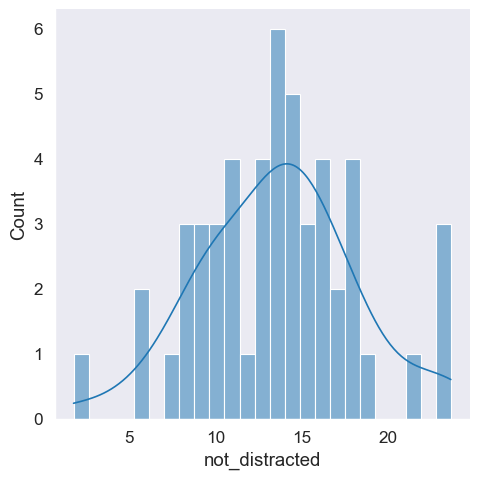

In [166]:
sns.displot(crash_df["not_distracted"] , kde = True , bins = 25)

**Joint Plot**

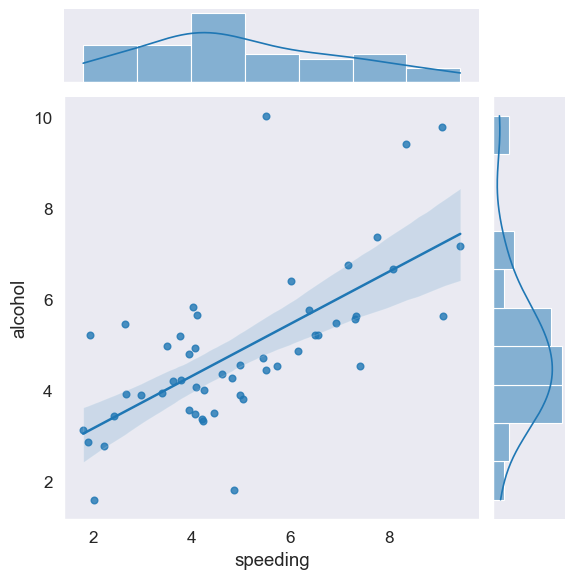

In [167]:
sns.jointplot(x = "speeding" , y = "alcohol" , data = crash_df , kind = 'reg')

**KDE Plot**

<Axes: xlabel='alcohol', ylabel='Density'>

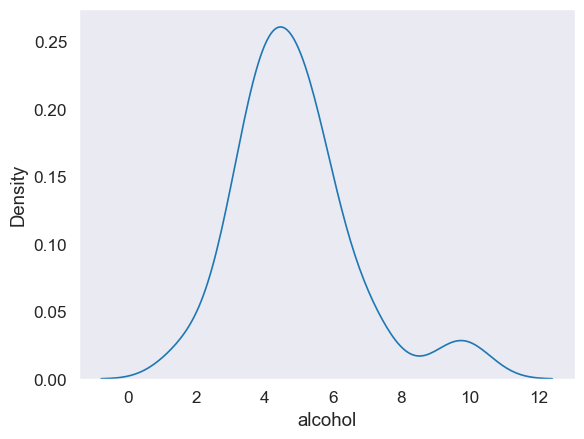

In [168]:
sns.kdeplot(crash_df['alcohol'])

**Pair Plot**

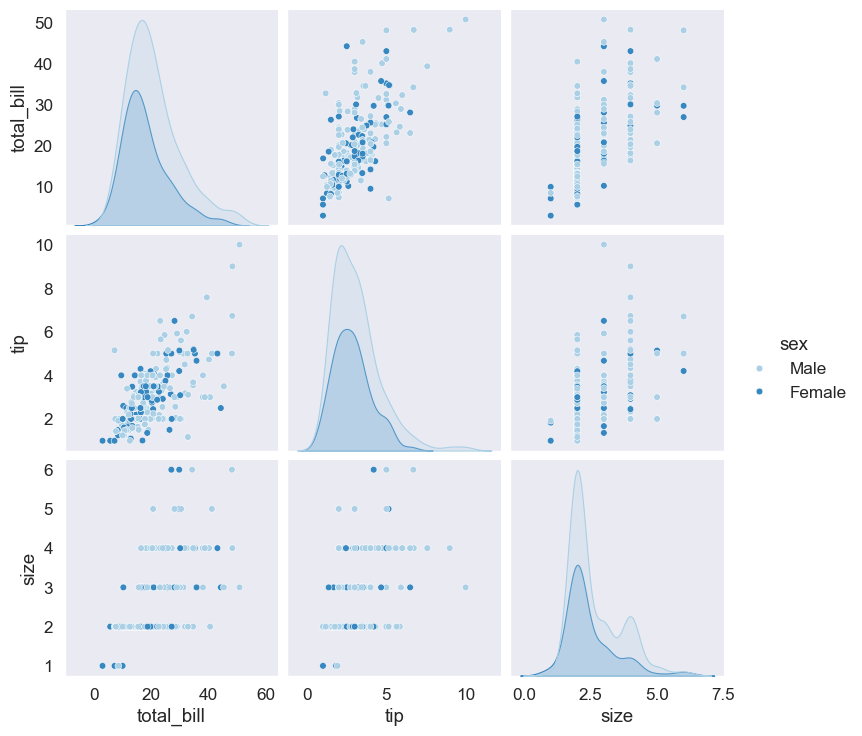

In [169]:
tips_df = sns.load_dataset("tips")

sns.pairplot(tips_df , hue = "sex" , palette= "Blues")

**Rug Plot**

<Axes: xlabel='tip'>

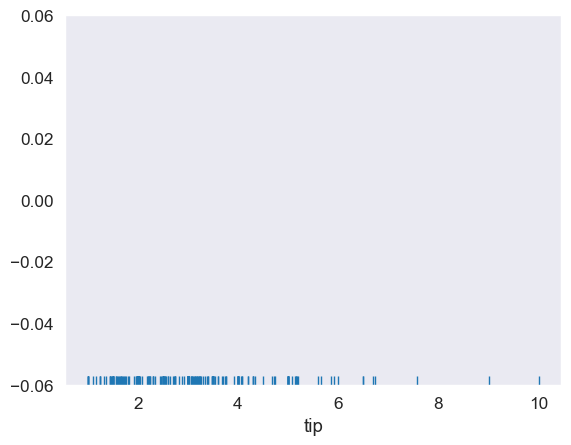

In [170]:
sns.rugplot(tips_df["tip"])

**Styling**

<Figure size 800x400 with 0 Axes>

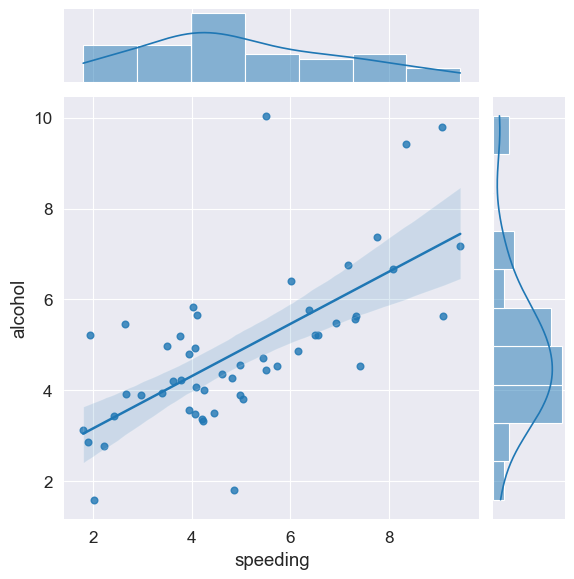

In [171]:
sns.set_style("darkgrid")
plt.figure(figsize=(8 , 4))
sns.set_context("paper" , font_scale = 1.4) #paper talk poster
sns.jointplot(x = "speeding" , y = "alcohol" , data = crash_df , kind = "reg")

sns.despine(left = True , bottom = True)

***Categorial Plot***

**Bar Plot**

<Axes: xlabel='sex', ylabel='total_bill'>

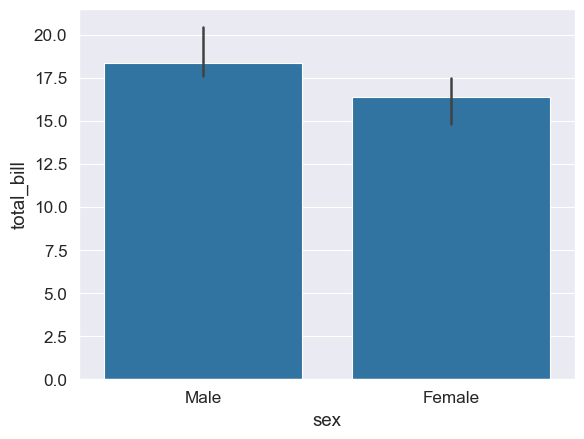

In [172]:
sns.barplot(x = "sex" , y = "total_bill" , data = tips_df , estimator= np.median)

**Count Plot**

<Axes: xlabel='sex', ylabel='count'>

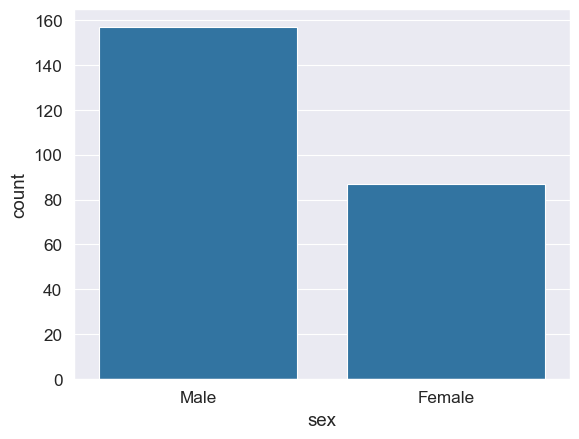

In [173]:
sns.countplot(x = "sex" , data = tips_df)

**Box Plot**

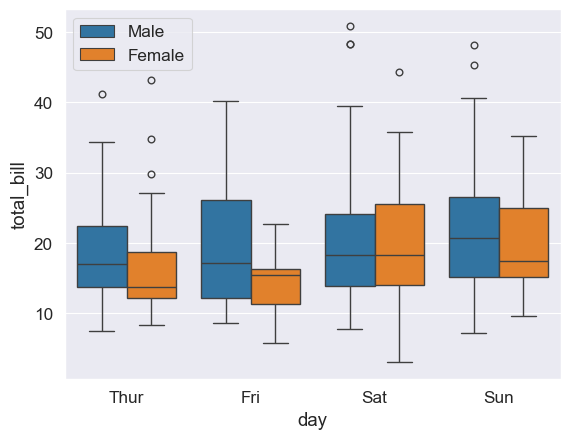

In [174]:
sns.boxplot(x = "day" , y = "total_bill" , data =tips_df , hue = "sex")
plt.legend(loc = 0)

**Violin Plot**

<Axes: xlabel='day', ylabel='total_bill'>

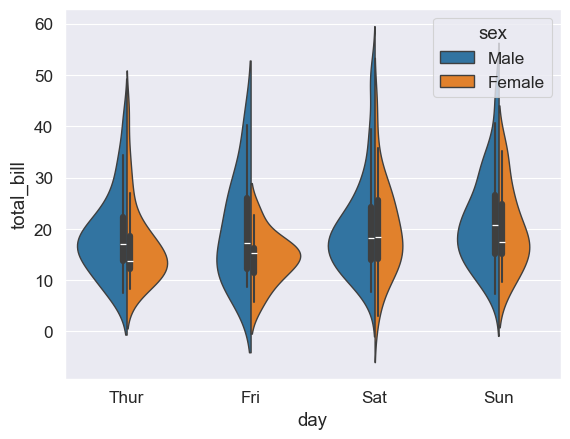

In [175]:
sns.violinplot(x = "day" , y = "total_bill" , data=tips_df , hue = "sex" , split= True)

**Strip Plot**

<Axes: xlabel='day', ylabel='total_bill'>

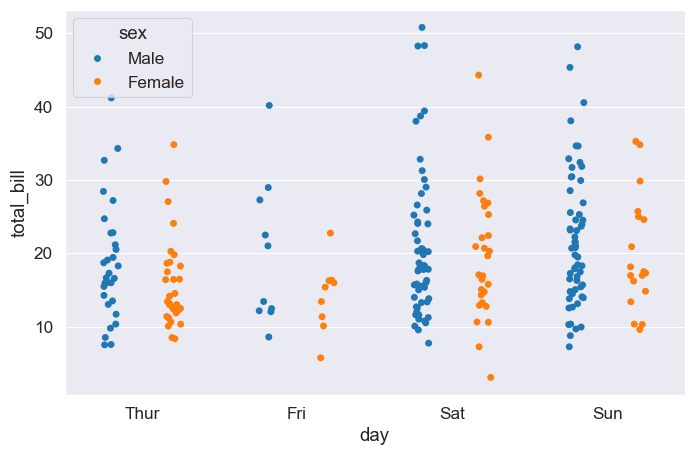

In [176]:
plt.figure(figsize=(8 ,5))

sns.stripplot(x = "day" , y = "total_bill" , data=tips_df , jitter= True , hue = "sex" , dodge = True)

**Swarm Plot**

<Axes: xlabel='day', ylabel='total_bill'>

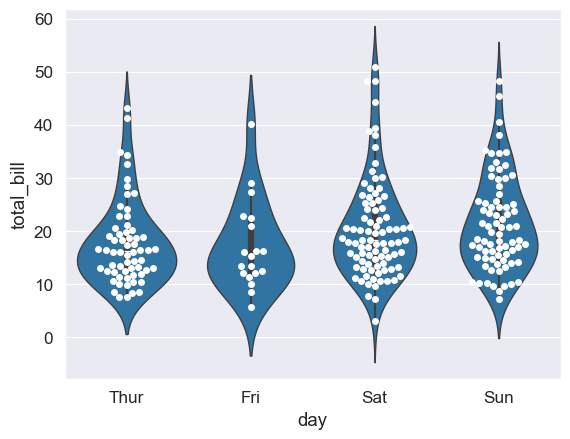

In [177]:
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')

**Palettes**

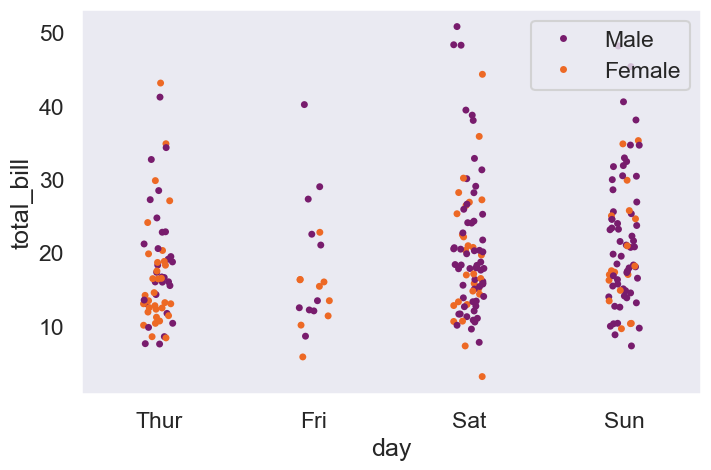

In [178]:
plt.figure(figsize =(8,5))
sns.set_style("dark")
sns.set_context("talk")
sns.stripplot(x="day" , y = "total_bill" , data=tips_df , hue="sex" , palette="inferno")
plt.legend(loc = 1)


***Matrix Plot***

**Heatmaps**

<Axes: >

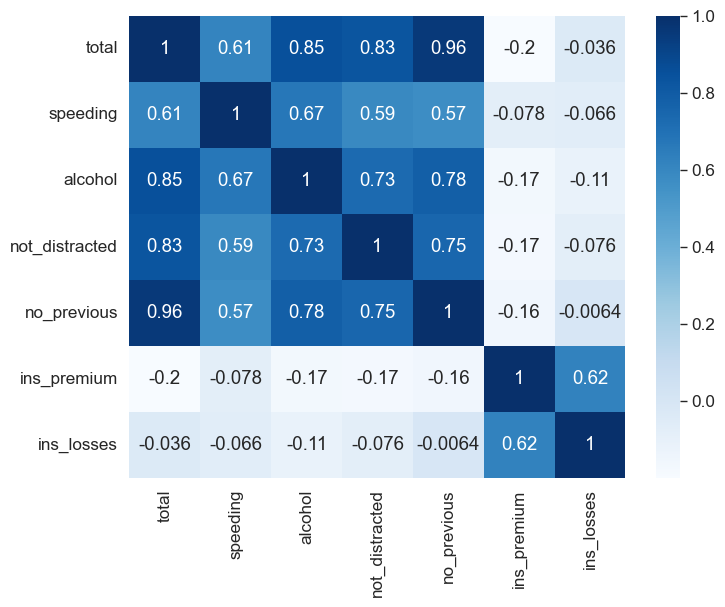

In [179]:
plt.figure(figsize=(8,6))
sns.set_context("paper" , font_scale= 1.4)

crash_df = crash_df.drop(columns= ["abbrev"])

crash_mx = crash_df.corr()

sns.heatmap(crash_mx , annot=True , cmap ="Blues")

<Axes: xlabel='year', ylabel='month'>

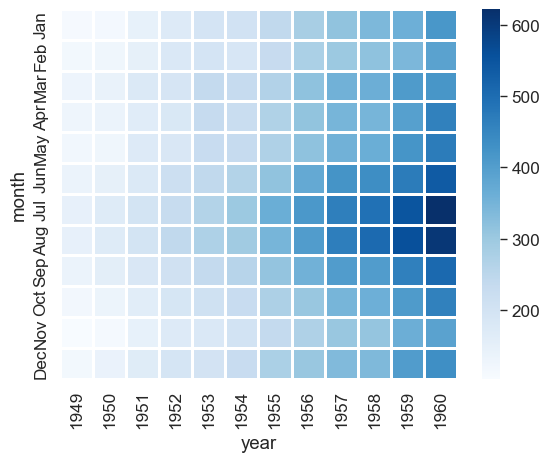

In [180]:
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index = "month" , columns = "year" , values = "passengers")
sns.heatmap(flights , cmap="Blues" , linecolor = "white" , linewidth = 1)

**Cluster Map**

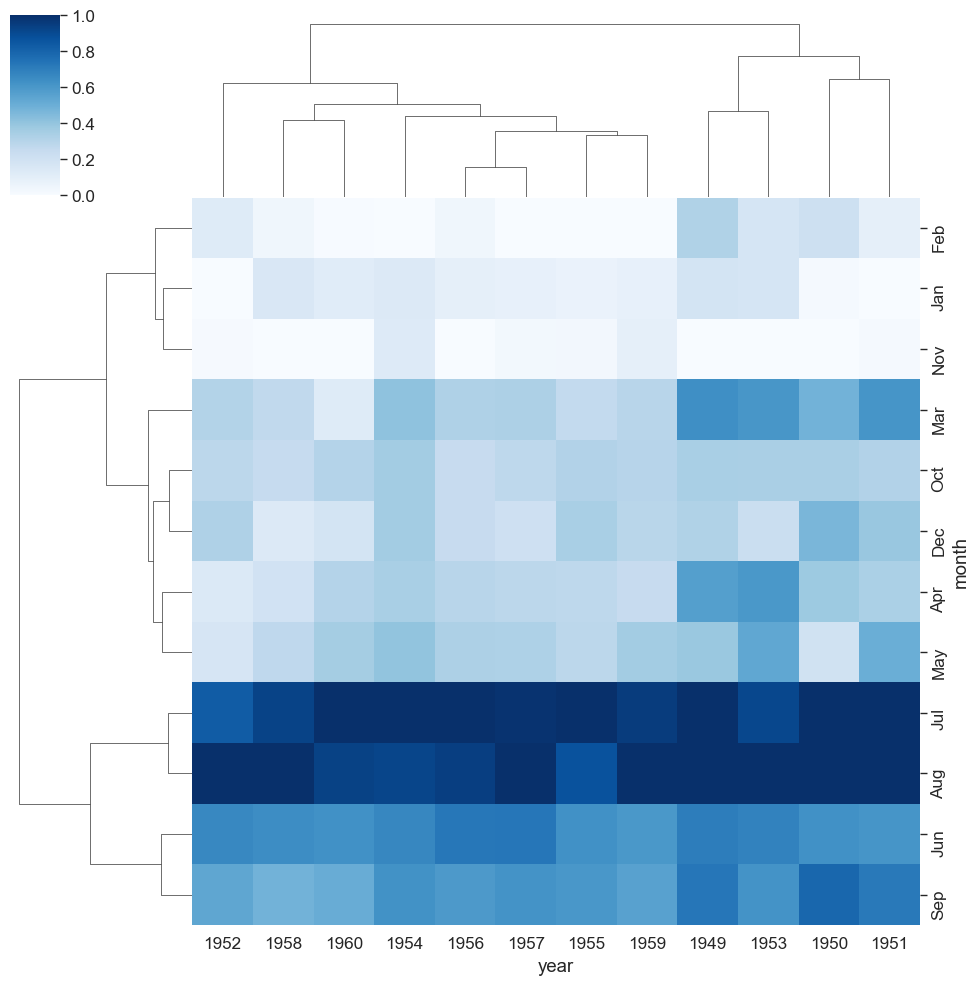

In [181]:
iris = sns.load_dataset("iris")
# species = iris.pop("species")
# sns.clustermap(iris)

sns.clustermap(flights , cmap="Blues" , standard_scale=1)

**PairGrid**

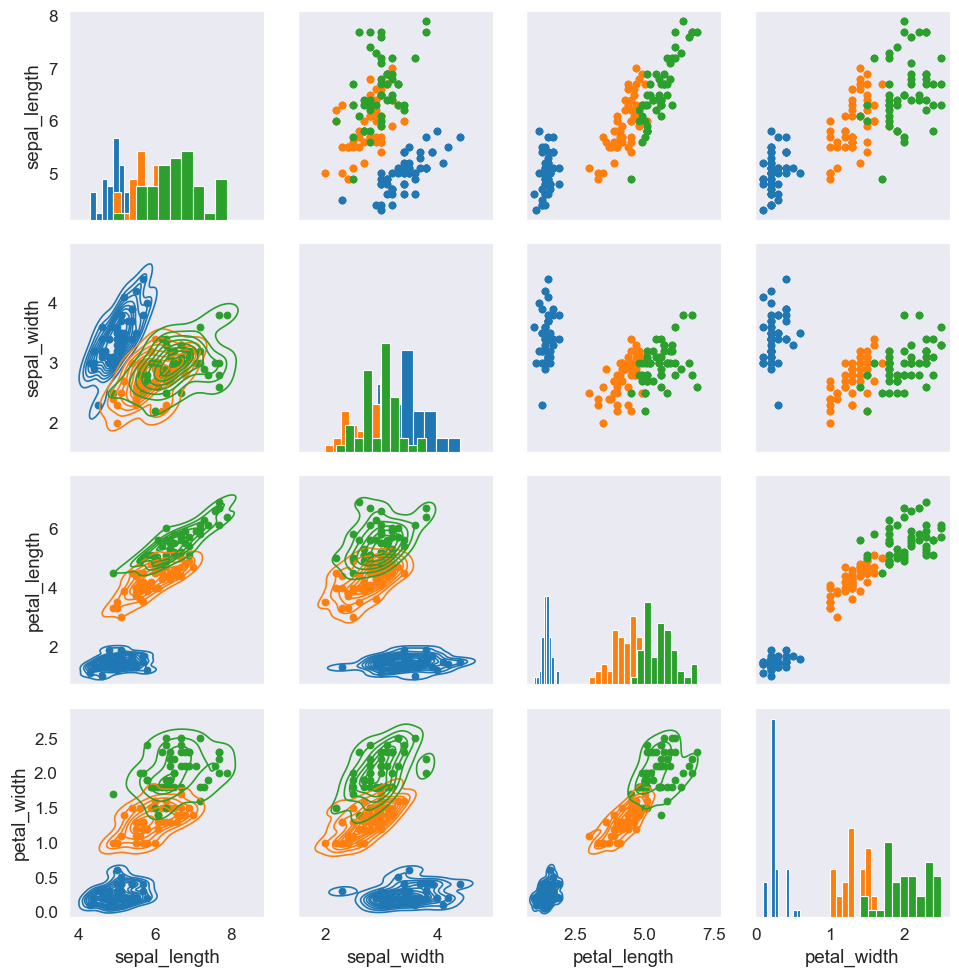

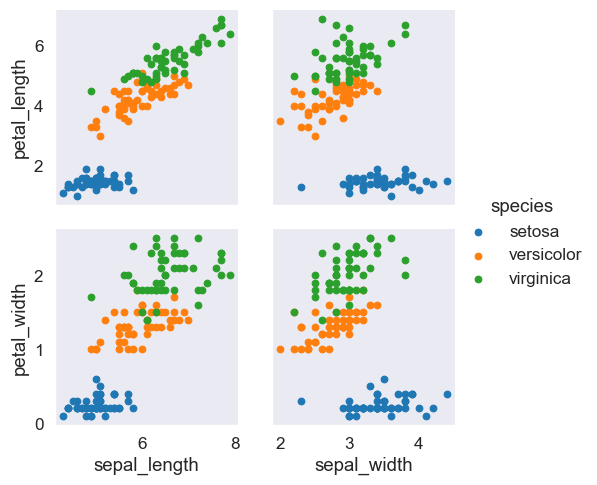

In [186]:
iris_g = sns.PairGrid(iris , hue = "species")
iris_g.map_offdiag(plt.scatter)
iris_g.map_diag(plt.hist)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)
iris_g = sns.PairGrid(iris , hue = "species" ,
                      x_vars = ["sepal_length" , "sepal_width"],
                      y_vars= ["petal_length" , "petal_width"])

iris_g.map(plt.scatter)
iris_g.add_legend()

**Facet Grid**

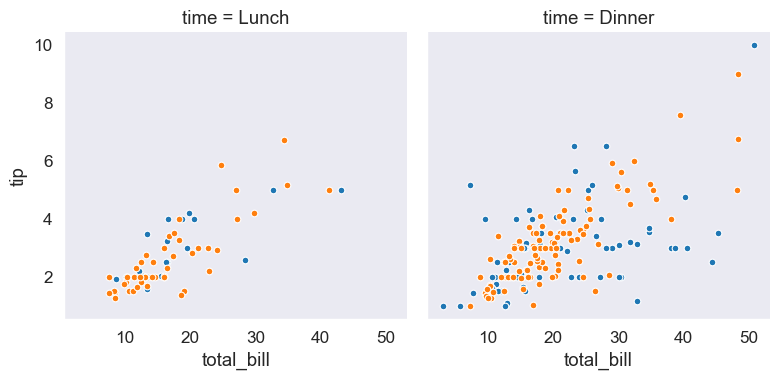

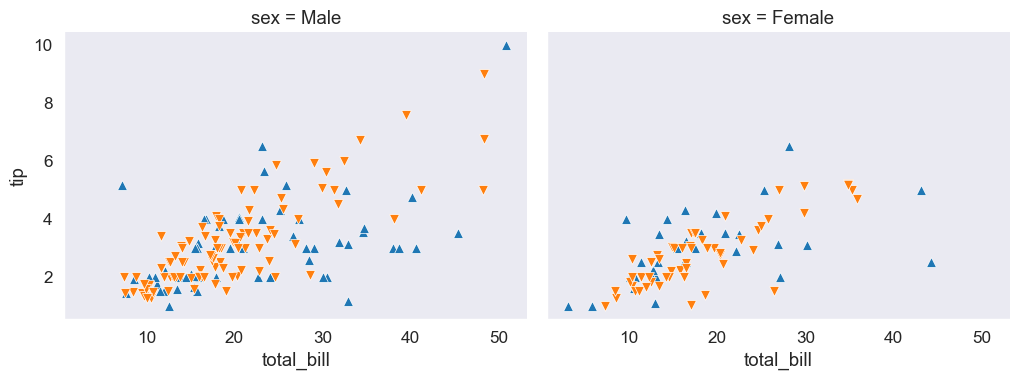

In [191]:
tips_fg = sns.FacetGrid(tips_df , col = "time" , hue = "smoker" , height = 4 , aspect = 1)
tips_fg.map(plt.scatter , "total_bill" , "tip" , edgecolor = "w")

kws = dict(s = 50 , linewidth =.5 , edgecolor="w")
tips_fg = sns.FacetGrid(tips_df , col="sex" , hue = "smoker" , height = 4 , aspect = 1.3 , 
                        hue_order = ["Yes" , "No"],
                        hue_kws = dict(marker =["^" , "v"]))
tips_fg.map(plt.scatter , "total_bill" , "tip" , **kws)

**Regerssion Plots**